## 2차 과제

- 주제: 데이터 크롤링을 활용한 뉴스 & 리뷰 데이터 분석
- 데이터: 자유롭게 크롤링
- 사용 라이브러리: selenium, beautifulsoup, etc.

### 1. 뉴스 기사 데이터 크롤링

1.1 원하는 뉴스 기사의 본문을 크롤링하시오.

In [28]:
from newspaper import Article                                                    #https://boringariel.tistory.com/6 참고
link = 'https://www.mediaus.co.kr/news/articleView.html?idxno=308205'
article = Article (link, language = 'ko')
article.download()
article.parse()
title = article.title
text = article.text
date = article.publish_date

In [29]:
print(text)

[미디어스=송창한 기자] 의대 증원에 반대하는 전공의들의 집단행동으로 의료 공백이 4주째 이어지는 가운데, 국민 건강을 위협하는 것은 정부도 마찬가지라는 보수언론 비판이 제기된다. 의료공백에 대한 대책도, 의사들과의 대화 창구도 없는 정부가 '2000명 증원'만 얘기하고 있다는 지적이다.

한편에서는 의사와 정부 모두 의료체계 개선의 핵심인 '공공의료'에는 관심이 없다는 지적이 나온다. 자신을 자영업자로 여기는 의사와 의사증원만 얘기하고 영리화 된 의료체계를 유지하려는 정부가 대치하는 상황에서 진짜 대안은 제시되지 못하고 있다는 것이다.

12일 서울 시내의 한 병원에 설치된 TV에 의대증원을 둘러싼 의료공백 관련 뉴스가 보도되고 있다 (사진=연합뉴스)

12일 서울대 의대 교수들은 정부가 오는 18일까지 합리적인 방안을 도출하지 않는다면 사직을 하겠다고 밝혔다. 전국 의대 교수들이 집단 사직 움직임을 보이는 가운데 서울대가 선봉에 선 것이다. 서울대 의대 교수들은 해외 기구에 의대 증원 분석을 맡기고, 의대 증원은 1년 유예하자고 정부에 제안했다. 서울대 의대 교수들은 또 정부·의사협회·여야·국민·교수·전공의가 참여하는 대화협의체를 구성하자고 했다.

의료 공백 사태가 장기화 될 조짐을 보이자 그동안 의사들에게 집중됐던 언론비판이 정부로 옮겨지는 모양새다. 지난 11일 중앙일보는 사설 <의료 공백 방치하는 의·정 대치…대화 물꼬부터 터야>에서 "어떤 명분이든 의사가 환자 곁을 떠나는 것은 비판받을 일이다. 하지만 이렇게 되지 않도록 관리하는 것은 정부의 몫"이라며 "10년 뒤부터 의사 수를 1만 명 늘린다면서 당장 의사 1만 명, 의대생 1만 명이 현장을 떠나고 병원들이 붕괴하는 것을 지켜만 보는 것은 이율배반 아닌가"라고 했다.

13일 동아일보는 사설 <의대생 집단 유급 임박… 대책도 없이 대화도 않고 파국 맞나>에서 "환자를 떠나는 제자들을 말리기는커녕 뒤따라 나간다는 의대 교수들도 실망스럽지만 이를 보고도 속수무책인 정부 역시 미덥지 못하기는 마찬가지

1.2 크롤링한 본문을 단어 단위로 나누고 각 단어가 나온 횟수와 함께 dataframe 형식으로 변환하시오.

In [30]:
import re
import pandas as pd
from konlpy.tag import Okt
from konlpy.tag import Hannanum
from konlpy.tag import Kkma
from konlpy.tag import Twitter
okt = Okt()

In [31]:
words_text = []
words_text = text.split()
# for line in text:
#     words = line.split('\n')  # 공백을 기준으로 단어로 분할
#     words_text.extend(words)  # 단어들을 리스트에 추가
print(words_text)

['[미디어스=송창한', '기자]', '의대', '증원에', '반대하는', '전공의들의', '집단행동으로', '의료', '공백이', '4주째', '이어지는', '가운데,', '국민', '건강을', '위협하는', '것은', '정부도', '마찬가지라는', '보수언론', '비판이', '제기된다.', '의료공백에', '대한', '대책도,', '의사들과의', '대화', '창구도', '없는', '정부가', "'2000명", "증원'만", '얘기하고', '있다는', '지적이다.', '한편에서는', '의사와', '정부', '모두', '의료체계', '개선의', '핵심인', "'공공의료'에는", '관심이', '없다는', '지적이', '나온다.', '자신을', '자영업자로', '여기는', '의사와', '의사증원만', '얘기하고', '영리화', '된', '의료체계를', '유지하려는', '정부가', '대치하는', '상황에서', '진짜', '대안은', '제시되지', '못하고', '있다는', '것이다.', '12일', '서울', '시내의', '한', '병원에', '설치된', 'TV에', '의대증원을', '둘러싼', '의료공백', '관련', '뉴스가', '보도되고', '있다', '(사진=연합뉴스)', '12일', '서울대', '의대', '교수들은', '정부가', '오는', '18일까지', '합리적인', '방안을', '도출하지', '않는다면', '사직을', '하겠다고', '밝혔다.', '전국', '의대', '교수들이', '집단', '사직', '움직임을', '보이는', '가운데', '서울대가', '선봉에', '선', '것이다.', '서울대', '의대', '교수들은', '해외', '기구에', '의대', '증원', '분석을', '맡기고,', '의대', '증원은', '1년', '유예하자고', '정부에', '제안했다.', '서울대', '의대', '교수들은', '또', '정부·의사협회·여야·국민·교수·전공의가', '참여하는', '대화협의체를', '구성하자고', '했다.', '의료', '공백', '사태

In [32]:
temp_okt_text = []
for i in range(len(words_text)):
    temp_okt_text.append(okt.nouns(words_text[i]))

print(temp_okt_text)

[['미디어스', '송창'], ['기자'], ['의대'], ['증원'], ['반대'], ['의'], ['집단', '행동'], ['의료'], ['공백'], ['주'], [], ['가운데'], ['국민'], ['건강'], ['위협'], ['것'], ['정부'], ['마찬가지'], ['보수', '언론'], ['비판'], ['제기'], ['의료', '공백'], ['대한'], ['대책'], ['의사'], ['대화'], ['창구'], [], ['정부'], ['명'], ['증원', '만'], ['얘기'], [], ['지적'], ['한편'], ['의사'], ['정부'], ['모두'], ['의료', '체계'], ['개선'], ['핵심'], ['의료'], ['관심'], [], ['지적'], [], ['자신'], ['자영', '업자'], [], ['의사'], ['의사', '증원'], ['얘기'], ['영리'], [], ['의료', '체계'], ['유지'], ['정부'], ['대치'], ['상황'], ['진짜'], ['대안'], ['제시'], ['못'], [], ['것'], [], ['서울'], ['시내'], [], ['병원'], ['설치'], [], ['의대', '증원'], [], ['의료', '공백'], ['관련'], ['뉴스'], ['보도'], [], ['사진', '연합뉴스'], [], ['서울대'], ['의대'], ['교수'], ['정부'], [], [], ['합리'], ['방안'], ['도출'], [], ['사직'], [], [], ['전국'], ['의대'], ['교수'], ['집단'], ['사직'], ['움직임'], [], ['가운데'], ['서울대'], ['선봉'], ['선'], ['것'], ['서울대'], ['의대'], ['교수'], ['해외'], ['기구'], ['의대'], ['증원'], ['분석'], [], ['의대'], ['증원'], [], ['유예'], ['정부'], ['제안'], ['서울대'], ['의대'], ['교수'], ['또'], ['정부', '의사',

In [33]:
temp_okt_text = pd.Series([x for x in temp_okt_text if len(x)<2])
pd.DataFrame(temp_okt_text)

,0
0,[기자]
1,[의대]
2,[증원]
3,[반대]
4,[의]
...,...
653,[네이버]
654,[뉴스스탠드]
655,[]
656,[구독]


In [34]:
print(temp_okt_text)

0         [기자]
1         [의대]
2         [증원]
3         [반대]
4          [의]
        ...   
653      [네이버]
654    [뉴스스탠드]
655         []
656       [구독]
657       [클릭]
Length: 658, dtype: object


1.3 불용어를 제거하시오.

In [35]:
from nltk.corpus import stopwords

In [36]:
stopwords_korean = ['기자', '이', '', '수', '명', '것', '연합뉴스', '미디어스',
                    '[미디어스=송창한', '기자]', '☞', '네이버', '뉴스스탠드에서',
                    '‘미디어스’를', '만나보세요~', '구독하기', '클릭!', '했다']

temp_okt_text = [i for i in words_text if i not in stopwords_korean]
print(temp_okt_text)

['의대', '증원에', '반대하는', '전공의들의', '집단행동으로', '의료', '공백이', '4주째', '이어지는', '가운데,', '국민', '건강을', '위협하는', '것은', '정부도', '마찬가지라는', '보수언론', '비판이', '제기된다.', '의료공백에', '대한', '대책도,', '의사들과의', '대화', '창구도', '없는', '정부가', "'2000명", "증원'만", '얘기하고', '있다는', '지적이다.', '한편에서는', '의사와', '정부', '모두', '의료체계', '개선의', '핵심인', "'공공의료'에는", '관심이', '없다는', '지적이', '나온다.', '자신을', '자영업자로', '여기는', '의사와', '의사증원만', '얘기하고', '영리화', '된', '의료체계를', '유지하려는', '정부가', '대치하는', '상황에서', '진짜', '대안은', '제시되지', '못하고', '있다는', '것이다.', '12일', '서울', '시내의', '한', '병원에', '설치된', 'TV에', '의대증원을', '둘러싼', '의료공백', '관련', '뉴스가', '보도되고', '있다', '(사진=연합뉴스)', '12일', '서울대', '의대', '교수들은', '정부가', '오는', '18일까지', '합리적인', '방안을', '도출하지', '않는다면', '사직을', '하겠다고', '밝혔다.', '전국', '의대', '교수들이', '집단', '사직', '움직임을', '보이는', '가운데', '서울대가', '선봉에', '선', '것이다.', '서울대', '의대', '교수들은', '해외', '기구에', '의대', '증원', '분석을', '맡기고,', '의대', '증원은', '1년', '유예하자고', '정부에', '제안했다.', '서울대', '의대', '교수들은', '또', '정부·의사협회·여야·국민·교수·전공의가', '참여하는', '대화협의체를', '구성하자고', '했다.', '의료', '공백', '사태가', '장기화', '될', '조짐을

1.4 처리한 데이터를 워드아트로 변환해 어떤 단어가 가장 많이 나왔는지 확인하시오(폰트, 색 등 자유).

In [37]:
# from wordcloud import WordCloud
# from collections import Counter
# import matplotlib.pyplot as plt
# font_path = "c:/windows/fonts/malgun.ttf"
# wordcloud = WordCloud(font_path = font_path, width = 800, height = 800, background_color = 'white')

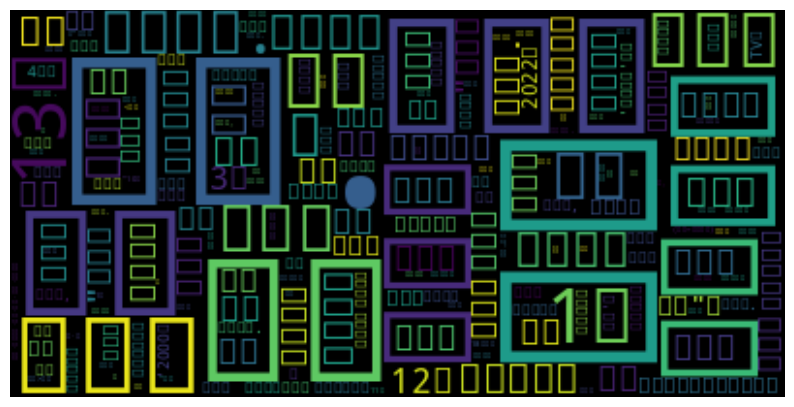

In [40]:
# count_text = Counter(temp_okt_text)
# wordcloud_text = wordcloud.generate_from_frequencies(count_text)
# fig_text = plt.figure(figsize = (10, 10))
# plt.axis('off')
# plt.imshow(wordcloud_text)        
from collections import Counter
from wordcloud import WordCloud
import matplotlib.pyplot as plt
font_path = "c:/windows/fonts/malgun.ttf"
wordcloud = WordCloud(font_path = font_path, width = 800, height = 800, background_color = 'white')

count_text = Counter(temp_okt_text)
wordcloud_text = WordCloud().generate_from_frequencies(count_text)

plt.figure(figsize=(10, 10))
plt.imshow(wordcloud_text, interpolation='bilinear')
plt.axis('off')
plt.show() 

# 이 부분에서 뭐가 잘못돼서 에러가 뜨는지 잘 모르겠습니다..



### 2. 플레이스토어 리뷰 데이터 크롤링(동적 크롤링)

2.1 100개 이상의 리뷰를 가진 앱에 있는 댓글 리뷰를 크롤링하시오.

In [ ]:
# 이 부분은 정말 모르겠어서 찾아보니까 플레이스토어 디벨로퍼 API를 사용해야 한다는데 어떻게 해야할지 아직 감이 안 잡힙니다..

2.2 크롤링한 데이터를 dataframe 형태로 변환하시오(날짜, 별점, 리뷰 유저 등).

2.3 긍정 리뷰와 부정 리뷰를 나누시오(기준은 자유).

### 3. 자유 분석

3.1 위에서 크롤링한 데이터들을 활용해 자유롭게 인사이트를 도출하시오.